In [1]:
print("hello")

hello


# Analyse simple sur la stat-desc
---

### Importation des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Data importation

In [32]:
try:
    df = pd.read_excel('data.xlsx')
except:
    print('erreur :')
    %pip install openpyxl

### Basic manipulation

In [33]:
df.head()

,annee,mois,rec_douane,rec_connexe
0,2018,janvier,46951137555,19.549.999.674
1,2018,février,47313934748,5.248.767.786
2,2018,mars,50398861182,6.547.525.686
3,2018,avril,58775911887,7.220.072.918
4,2018,mai,58775911887,6.938.560.710


### Data manipulation
---

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   annee        60 non-null     int64 
 1   mois         60 non-null     object
 2   rec_douane   48 non-null     object
 3   rec_connexe  60 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


In [35]:
print(df.isnull().sum())

annee           0
mois            0
rec_douane     12
rec_connexe     0
dtype: int64


In [36]:
df_copy = df.copy()

In [37]:
df_copy.head()

,annee,mois,rec_douane,rec_connexe
0,2018,janvier,46951137555,19.549.999.674
1,2018,février,47313934748,5.248.767.786
2,2018,mars,50398861182,6.547.525.686
3,2018,avril,58775911887,7.220.072.918
4,2018,mai,58775911887,6.938.560.710


In [38]:
df_copy.rec_douane.unique()

array([46951137555, 47313934748, 50398861182, 58775911887, 68656726875,
       67199882580, 91744270326, 81660584134, 86950027364, 77933324364,
       77055520300, 79921904201, 80077845319, 92707936942, 83347546877,
       90188111899, 82674828124, 86585709871, 74503183149, 71673553416,
       72467971836, 67422443268, 64175523691, '605 672 967 11',
       '674 329 875 42', '598 034 911 26', '572 341 506 44',
       '508 469 326 05', '547 063 519 15', '683 389 565 01',
       '868 370 554 60', '886 483 694 70', '766 505 408 72',
       '721 957 331 65', '636 420 776 89', '660 550 884 82',
       '717 241 756 94', '757 398 038 44', '796 947 998 13',
       '924 727 438 60', '976 677 455 15', '971 394 666 03', 220499157780,
       '127 1200 116 74', 118926586673, 122463353583, 127929318831, nan],
      dtype=object)

In [39]:
df_copy.rec_connexe.unique()

array(['19.549.999.674', '  5.248.767.786', '  6.547.525.686',
       '  7.220.072.918', '  6.938.560.710', '10.087.033.209',
       '13.747.618.364', '18.154.441.800', '22.319.200.107',
       '18.872.341.724', '17.499.907.474', '20.518.021.342',
       '20.456.591.937', '16.382.282.808', '20.163.096.373',
       '22.212.658.797', '19.504.046.902', '16.797.307.841',
       '18.382.897.338', '28.529.563.557', '25.723.259.339',
       '27.152.511.693', '23.529.903.715', '24.667.260.047',
       '17.818.736.907', '17.921.237.425', '18.428.901.188',
       '14.310.096.310', '14.515.819.753', '17.726.283.703',
       '18.939.079.682', '18.318.468.473', '17.534.840.664',
       '19.586.626.410', '15.957.368.731', '17.014.737.376',
       '23.049.066.917', '16.036.148.675', '17.654.667.381',
       '18.520.275.640', '18.661.258.606', '33.011.803.549',
       '22.590.445.106', '23.409.205.473', '21.840.804.138',
       '23.273.983.165', '23.917.713.477', '20,720,485,819',
       '21,390,075,4

#### Deleting all empties str inside the value (suppression des vides dans une chaine)

In [40]:
def str_with_point_or_comma(v):
    try:
        k = str(v).strip()

        if ' ' in k:
            l = k.split(' ')
            
            # On supprime les valeurs vide de la liste
            for i in range(len(l)-1, -1, -1):
                if l[i] == "":
                    del l[i]
            
            if len(l)==1:
                return int(l[0])
            else:
                concatenation = ''.join(str(element) for element in l) # On fait la concaténation des entiers converti en str
                
                if '.' in concatenation:
                    l = concatenation.split('.')
                    concatenation = ''.join(str(element) for element in l)

                    if ',' in concatenation:
                        l = concatenation.split(',')
                        concatenation = ''.join(str(element) for element in l)
                        return int(concatenation)
                    return int(concatenation)
                return int(concatenation)
            
        elif '.' in k:
            l = k.split('.')
            concatenation = ''.join(str(element) for element in l)
            return int(concatenation)
        
        elif ',' in k:
            l = k.split(',')
            concatenation = ''.join(str(element) for element in l)
            return int(concatenation)
        
        return int(k)
    except:
        return v

#### Converti un objet en un int

In [41]:
str_with_point_or_comma('7170.24175.694 ')

717024175694

In [42]:
# Applying converte_to_number function to df_copy
df_copy.rec_douane = df_copy.rec_douane.apply(str_with_point_or_comma)

In [43]:
df_copy.head()

,annee,mois,rec_douane,rec_connexe
0,2018,janvier,4.695114e+10,19.549.999.674
1,2018,février,4.731393e+10,5.248.767.786
2,2018,mars,5.039886e+10,6.547.525.686
3,2018,avril,5.877591e+10,7.220.072.918
4,2018,mai,5.877591e+10,6.938.560.710


In [44]:
df_copy.rec_connexe.unique()

array(['19.549.999.674', '  5.248.767.786', '  6.547.525.686',
       '  7.220.072.918', '  6.938.560.710', '10.087.033.209',
       '13.747.618.364', '18.154.441.800', '22.319.200.107',
       '18.872.341.724', '17.499.907.474', '20.518.021.342',
       '20.456.591.937', '16.382.282.808', '20.163.096.373',
       '22.212.658.797', '19.504.046.902', '16.797.307.841',
       '18.382.897.338', '28.529.563.557', '25.723.259.339',
       '27.152.511.693', '23.529.903.715', '24.667.260.047',
       '17.818.736.907', '17.921.237.425', '18.428.901.188',
       '14.310.096.310', '14.515.819.753', '17.726.283.703',
       '18.939.079.682', '18.318.468.473', '17.534.840.664',
       '19.586.626.410', '15.957.368.731', '17.014.737.376',
       '23.049.066.917', '16.036.148.675', '17.654.667.381',
       '18.520.275.640', '18.661.258.606', '33.011.803.549',
       '22.590.445.106', '23.409.205.473', '21.840.804.138',
       '23.273.983.165', '23.917.713.477', '20,720,485,819',
       '21,390,075,4

In [45]:
str_with_point_or_comma('5.248, 767 .786 ')

5248767786

In [46]:
df_copy.rec_connexe = df_copy.rec_connexe.apply(str_with_point_or_comma)

In [47]:
df_copy.head()

,annee,mois,rec_douane,rec_connexe
0,2018,janvier,4.695114e+10,19549999674
1,2018,février,4.731393e+10,5248767786
2,2018,mars,5.039886e+10,6547525686
3,2018,avril,5.877591e+10,7220072918
4,2018,mai,5.877591e+10,6938560710


In [48]:
df_copy.rec_connexe.unique()

array([19549999674,  5248767786,  6547525686,  7220072918,  6938560710,
       10087033209, 13747618364, 18154441800, 22319200107, 18872341724,
       17499907474, 20518021342, 20456591937, 16382282808, 20163096373,
       22212658797, 19504046902, 16797307841, 18382897338, 28529563557,
       25723259339, 27152511693, 23529903715, 24667260047, 17818736907,
       17921237425, 18428901188, 14310096310, 14515819753, 17726283703,
       18939079682, 18318468473, 17534840664, 19586626410, 15957368731,
       17014737376, 23049066917, 16036148675, 17654667381, 18520275640,
       18661258606, 33011803549, 22590445106, 23409205473, 21840804138,
       23273983165, 23917713477, 20720485819, 21390075497, 27574121734,
       26861850903, 34393431285, 36360766011, 40254144158, 46817361628,
       45234266283, 42991169158, 41916221297, 47684200972], dtype=int64)

In [49]:
df_copy.rec_douane.unique()

array([4.69511376e+10, 4.73139347e+10, 5.03988612e+10, 5.87759119e+10,
       6.86567269e+10, 6.71998826e+10, 9.17442703e+10, 8.16605841e+10,
       8.69500274e+10, 7.79333244e+10, 7.70555203e+10, 7.99219042e+10,
       8.00778453e+10, 9.27079369e+10, 8.33475469e+10, 9.01881119e+10,
       8.26748281e+10, 8.65857099e+10, 7.45031831e+10, 7.16735534e+10,
       7.24679718e+10, 6.74224433e+10, 6.41755237e+10, 6.05672967e+10,
       6.74329875e+10, 5.98034911e+10, 5.72341506e+10, 5.08469326e+10,
       5.47063519e+10, 6.83389565e+10, 8.68370555e+10, 8.86483695e+10,
       7.66505409e+10, 7.21957332e+10, 6.36420777e+10, 6.60550885e+10,
       7.17241757e+10, 7.57398038e+10, 7.96947998e+10, 9.24727439e+10,
       9.76677455e+10, 9.71394666e+10, 2.20499158e+11, 1.27120012e+11,
       1.18926587e+11, 1.22463354e+11, 1.27929319e+11,            nan])

### Missing data Manipulation

There are a lot of technics for filling missing data, in our case, we will use KNNImputer. Such as :

- Next or Previous Value 
- K Nearest Neighbors
- Maximum or Minimum Value
- Missing Value Prediction
- Most Frequent Value
- Average or Linear Interpolation
- (Rounded) Mean or Moving Average or Median Value
- Fixed Value

In [51]:
df_copy.isnull().sum()

annee           0
mois            0
rec_douane     12
rec_connexe     0
dtype: int64

In [54]:
df_copy.tail(13)

,annee,mois,rec_douane,rec_connexe
47,2021,décembre,1.279293e+11,23917713477
48,2022,janvier,NaN,20720485819
49,2022,février,NaN,21390075497
50,2022,mars,NaN,27574121734
51,2022,avril,NaN,26861850903
52,2022,mai,NaN,34393431285
53,2022,juin,NaN,36360766011
54,2022,juillet,NaN,40254144158
55,2022,août,NaN,46817361628
56,2022,septembre,NaN,45234266283


#### visualling missing data

In [61]:
%pip install missingno
%pip install datatile

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/144.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/144.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/144.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/144.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/144.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/144.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/144.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/144.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/144.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/144.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/144.5 kB ? eta -:--:--
     -------- ----------------------------- 30.7/144.5 kB 59.5 kB/s eta 0:00:02
     -------- ----------------------------- 

In [56]:
import missingno as msno # to visualize missing value

<Axes: >

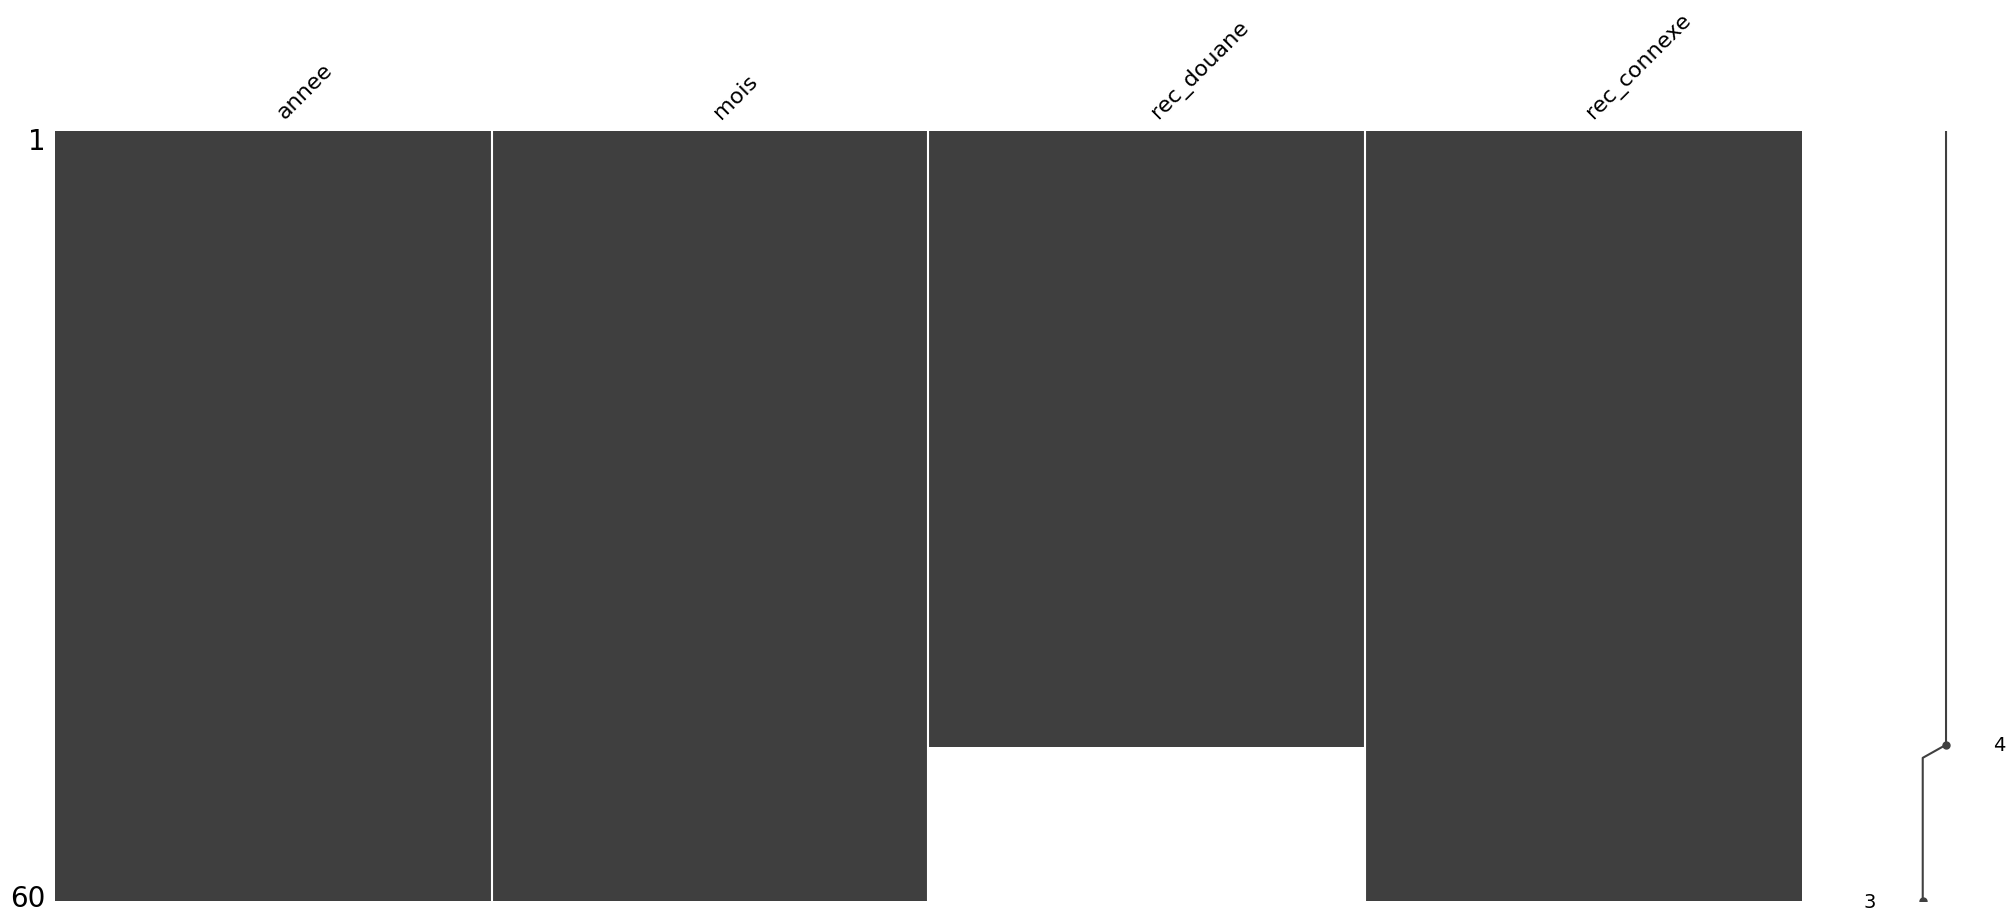

In [57]:
# visualize missing data
msno.matrix(df_copy)

<Axes: >

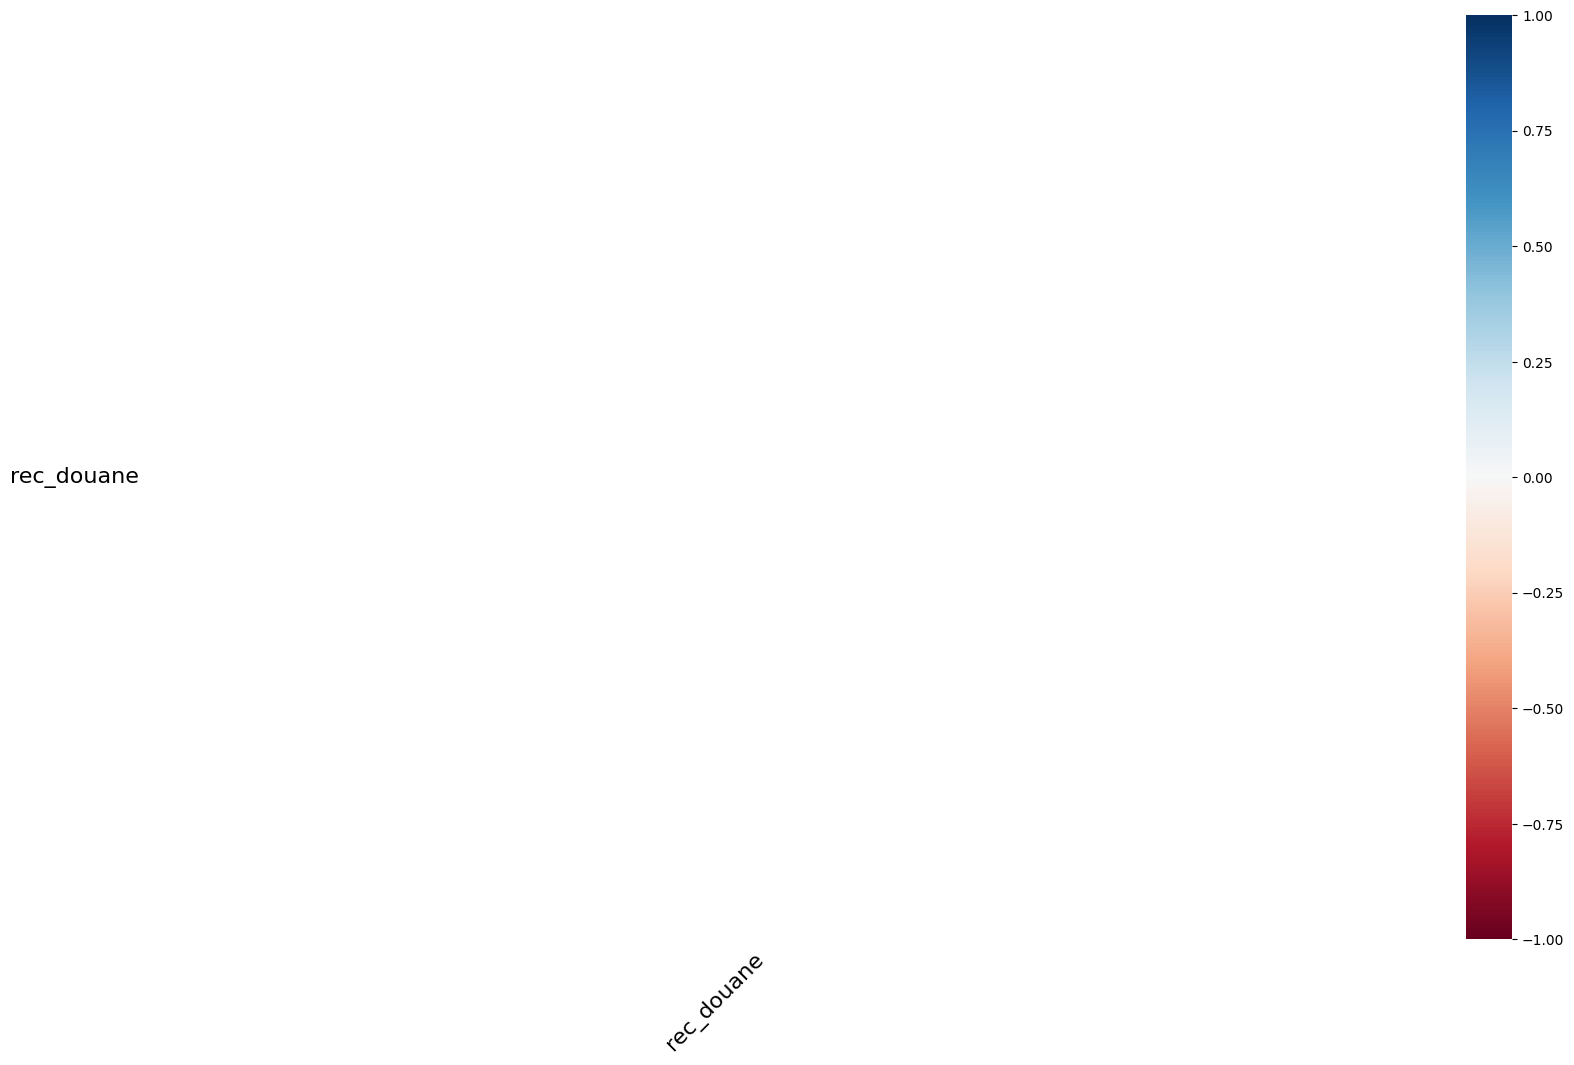

In [62]:
msno.heatmap(df_copy)

##### Missing data summary

In [65]:
# Exhaustive Summary of dataframe 
from datatile.summary.df import DataFrameSummary
dfs = DataFrameSummary(df_copy.iloc[:,2:])
dfs.columns_stats

,rec_douane,rec_connexe
counts,48,60
uniques,47,59
missing,12,0
missing_perc,20%,0%
types,numeric,numeric


#### Imputation with KNNImputer

In [67]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [75]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=6)

# Sélection de la colonne "rec_douane"
rec_douane = df_copy.rec_douane

# Réorganiser les données pour correspondre à la forme requise
rec_douane = rec_douane.values.reshape(-1, 1)

# Appliquer l'imputation
imputed_rec_douane = imputer.fit_transform(rec_douane)

# Mise à jour de la colonne "rec_douane"
df_copy["rec_douane"] = imputed_rec_douane

In [76]:
# Exhaustive Summary of dataframe 
from datatile.summary.df import DataFrameSummary
dfs = DataFrameSummary(df_copy.iloc[:,2:])
dfs.columns_stats

,rec_douane,rec_connexe
counts,60,60
uniques,48,59
missing,0,0
missing_perc,0%,0%
types,numeric,numeric


In [77]:
df_copy.tail(12)

,annee,mois,rec_douane,rec_connexe
48,2022,janvier,8.048956e+10,20720485819
49,2022,février,8.048956e+10,21390075497
50,2022,mars,8.048956e+10,27574121734
51,2022,avril,8.048956e+10,26861850903
52,2022,mai,8.048956e+10,34393431285
53,2022,juin,8.048956e+10,36360766011
54,2022,juillet,8.048956e+10,40254144158
55,2022,août,8.048956e+10,46817361628
56,2022,septembre,8.048956e+10,45234266283
57,2022,octobre,8.048956e+10,42991169158


#### Imputation with Means of previous months

KNNImputer doesn't work well, we choose an others custom technic

In this case, we will impute using the means of the previous months, except for the last month where we have missing data.

In [79]:
# Iterate over each month in the last year
last_year = df_copy[df_copy["annee"] == df_copy["annee"].max()]

previous_year = df_copy[df_copy["annee"] < df_copy["annee"].max()]

In [81]:
last_year.head()

,annee,mois,rec_douane,rec_connexe
48,2022,janvier,8.048956e+10,20720485819
49,2022,février,8.048956e+10,21390075497
50,2022,mars,8.048956e+10,27574121734
51,2022,avril,8.048956e+10,26861850903
52,2022,mai,8.048956e+10,34393431285


In [82]:
previous_year.head(13)

,annee,mois,rec_douane,rec_connexe
0,2018,janvier,4.695114e+10,19549999674
1,2018,février,4.731393e+10,5248767786
2,2018,mars,5.039886e+10,6547525686
3,2018,avril,5.877591e+10,7220072918
4,2018,mai,5.877591e+10,6938560710
5,2018,juin,6.865673e+10,10087033209
6,2018,juillet,6.719988e+10,13747618364
7,2018,août,9.174427e+10,18154441800
8,2018,septembre,8.166058e+10,22319200107
9,2018,octobre,8.695003e+10,18872341724


In [102]:
month = previous_year.groupby('mois').rec_douane.mean()

In [106]:
month

mois
août         1.183959e+11
avril        6.976310e+10
décembre     8.320061e+10
février      6.663724e+10
janvier      6.337386e+10
juillet      7.981600e+10
juin         7.592641e+10
mai          7.307093e+10
mars         6.966252e+10
novembre     8.500371e+10
octobre      8.874878e+10
septembre    9.227563e+10
Name: rec_douane, dtype: float64

In [107]:
# Replace the values in the last year with the monthly means
for month_name, mean_value in month.items():
    last_year.loc[last_year["mois"] == month_name, "rec_douane"] = mean_value

# Update the original DataFrame with the imputed values
df_copy.update(last_year)

In [109]:
df_copy.tail(12)

,annee,mois,rec_douane,rec_connexe
48,2022,janvier,6.337386e+10,20720485819
49,2022,février,6.663724e+10,21390075497
50,2022,mars,6.966252e+10,27574121734
51,2022,avril,6.976310e+10,26861850903
52,2022,mai,7.307093e+10,34393431285
53,2022,juin,7.592641e+10,36360766011
54,2022,juillet,7.981600e+10,40254144158
55,2022,août,1.183959e+11,46817361628
56,2022,septembre,9.227563e+10,45234266283
57,2022,octobre,8.874878e+10,42991169158


In this case, the type of rec_douane changes the type beacause we are using means, the have to change rec_douane to int value

In [111]:
df_copy.rec_douane = df_copy.rec_douane.apply(lambda x: int(x))

In [112]:
df_copy.tail(12)

,annee,mois,rec_douane,rec_connexe
48,2022,janvier,63373856737,20720485819
49,2022,février,66637235825,21390075497
50,2022,mars,69662523273,27574121734
51,2022,avril,69763102305,26861850903
52,2022,mai,73070925062,34393431285
53,2022,juin,75926413107,36360766011
54,2022,juillet,79816003888,40254144158
55,2022,août,118395916678,46817361628
56,2022,septembre,92275629673,45234266283
57,2022,octobre,88748781686,42991169158


Now we are abble to analyse 

### Descriptive analysis
---

##### Descriptive stat

In [116]:
df_copy.iloc[:,2:].describe()

,rec_douane,rec_connexe
count,6.000000e+01,6.000000e+01
mean,8.048956e+10,2.221495e+10
std,2.601989e+10,9.481640e+09
min,4.695114e+10,5.248768e+09
25%,6.705922e+10,1.762471e+10
50%,7.628848e+10,1.987486e+10
75%,8.737461e+10,2.410510e+10
max,2.204992e+11,4.768420e+10


In [118]:
# Calculate the coefficient of variation (CV) for the columns "rec_douane" and "rec_connexe"
cv_rec_douane = (df_copy["rec_douane"].std() / df_copy["rec_douane"].mean()) * 100
cv_rec_connexe = (df_copy["rec_connexe"].std() / df_copy["rec_connexe"].mean()) * 100

# Print the descriptive statistics and CV values
print("Descriptive Statistics:")
print(df_copy.iloc[:, 2:].describe())

print("\nCoefficient of Variation (CV):")
print("rec_douane: {:.2f}%".format(cv_rec_douane))
print("rec_connexe: {:.2f}%".format(cv_rec_connexe))

Descriptive Statistics:
         rec_douane   rec_connexe
count  6.000000e+01  6.000000e+01
mean   8.048956e+10  2.221495e+10
std    2.601989e+10  9.481640e+09
min    4.695114e+10  5.248768e+09
25%    6.705922e+10  1.762471e+10
50%    7.628848e+10  1.987486e+10
75%    8.737461e+10  2.410510e+10
max    2.204992e+11  4.768420e+10

Coefficient of Variation (CV):
rec_douane: 32.33%
rec_connexe: 42.68%


#### Correlation

In [120]:
df_copy.iloc[:, 2:].corr()

,rec_douane,rec_connexe
rec_douane,1.00000,0.29391
rec_connexe,0.29391,1.00000
